In [1]:
from langgraph.graph import StateGraph , START ,END
from typing import TypedDict ,List
import math

In [2]:
class AgentState(TypedDict):
    name : str 
    values: List[int]
    result: str 


In [3]:
def process_values(state: AgentState) -> AgentState:
    state["result"] = f"Hi {state["name"]} your account is worth : {sum(state["values"]) }$"
    return state

In [4]:
builder = StateGraph(AgentState)
builder.add_node("process_values",process_values)

builder.set_entry_point("process_values")
builder.set_finish_point("process_values")
graph = builder.compile()




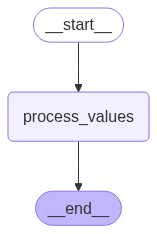

In [5]:
from IPython.display import display ,Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [6]:
answers = graph.invoke({"name": "Saad", "values": [11,1231,4,13]})
print(answers)

{'name': 'Saad', 'values': [11, 1231, 4, 13], 'result': 'Hi Saad your account is worth : 1259$'}


Exercice 2 :

In [7]:
class AgentStateEx1(TypedDict):
    name : str
    operation: str
    values : List[int]
    result:str
    
def calc(state: AgentStateEx1) -> AgentStateEx1:
    if state["operation"] == "+":
        state['result'] = f"Hey {state["name"]} your result is : {sum(state["values"])}"
    elif state["operation"] == "*":
        state['result'] = f"Hey {state["name"]} your result is : {math.prod(state["values"])}"
    return state

builder2 = StateGraph(AgentStateEx1)
builder2.add_node("calc_node", calc)

builder2.set_entry_point("calc_node")
builder2.set_finish_point("calc_node")

graph2 = builder2.compile()

answer2 = graph2.invoke({"name": "Saad", "values": [1,2,3,4,5] , "operation":"+"})
print(answer2["result"])
    

Hey Saad your result is : 15


Exercice 2: 

Create a graph that takes a name , skills and an age of a personn and then return a short greeting

In [8]:
class AgentState2(TypedDict):
    name: str
    skills: List[str]
    age: int
    result: str
    
def greeting(state: AgentState2) ->AgentState2:
    state["result"]=  f"{state["name"]} , welcome to our system ! "
    return state

def age(state: AgentState2) ->AgentState2:
    state["result"]= state["result"] +  f" You are {state["age"]} years old ! "
    return state

def skills(state: AgentState2) ->AgentState2:
    state["result"]= state["result"] +  f" You have skills in {", ".join(state["skills"])} "
    return state

builder3 = StateGraph(AgentState2)

builder3.add_node("greeting_node", greeting)
builder3.add_node("age_node", age)
builder3.add_node("skills_node", skills)

builder3.set_entry_point("greeting_node")
builder3.add_edge("greeting_node", "age_node")
builder3.add_edge("age_node",'skills_node')

builder3.set_finish_point("skills_node")

app = builder3.compile()

resultat = app.invoke({"name":"Saad", "age":"20" , "skills":["Python","NextJs", "Java"]})
print(resultat["result"])

    

Saad , welcome to our system !  You are 20 years old !  You have skills in Python, NextJs, Java 


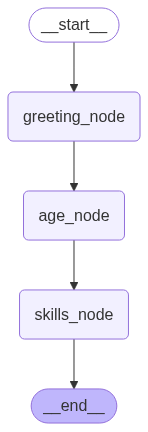

In [9]:
display(Image(app.get_graph().draw_mermaid_png()))

Exercice: Create a graph with 2 routers to make some math operations in numbers

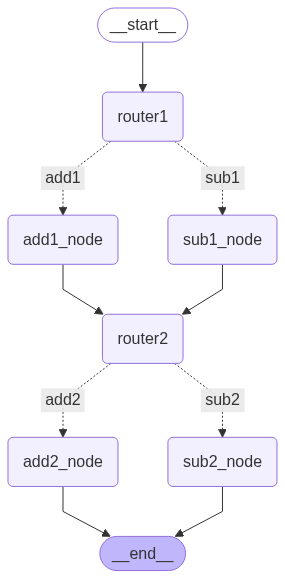

In [10]:
class AgentStateCond(TypedDict):
    number1: int
    number2: int 
    number3: int
    number4: int
    op1: str
    op2: str
    result: int


def add1 (state: AgentStateCond) -> AgentStateCond:
    state["result"] = state["number1"] + state["number2"]
    return state

def sub1 (state: AgentStateCond) -> AgentStateCond:
    state["result"] = state["number1"] - state["number2"]
    return state

def add2 (state: AgentStateCond) -> AgentStateCond:
    state["result"] = state["result"] +  state["number4"] + state["number3"]
    return state

def sub2 (state: AgentStateCond) -> AgentStateCond:
    state["result"] = state["result"] + state["number3"] - state["number4"]
    return state

def next_node1(state: AgentStateCond) -> AgentStateCond:
    if (state["op1"] == "+") :
        return "add1"
    elif(state["op1"] == "-"):
        return "sub1"

def next_node2(state: AgentStateCond) -> AgentStateCond:
    if (state["op2"] == "+") :
        return "add2"
    elif(state["op2"] == "-"):
        return "sub2"
    

cond_graph = StateGraph(AgentStateCond)

cond_graph.add_node("add1_node",add1)
cond_graph.add_node("add2_node",add2)
cond_graph.add_node("sub1_node",sub1)
cond_graph.add_node("sub2_node",sub2)
cond_graph.add_node("router1", lambda state: state)
cond_graph.add_node("router2", lambda state: state)

cond_graph.add_edge(START,"router1")
cond_graph.add_conditional_edges(
    "router1",
    next_node1,
    {
        "add1": "add1_node",
        "sub1": "sub1_node"
    }
    
)

cond_graph.add_edge("add1_node","router2")
cond_graph.add_edge("sub1_node","router2")

cond_graph.add_conditional_edges(
    "router2",
    next_node2,
        {
        "add2": "add2_node",
        "sub2": "sub2_node"
    }
    
    )

cond_graph.add_edge("add2_node", END)
cond_graph.add_edge("sub2_node", END)

app2 = cond_graph.compile()

display(Image(app2.get_graph().draw_mermaid_png()))



In [16]:
answer4 = app2.invoke({"number1": 1 , "number2":2 ,"number3":3 , "number4":4 , "op1":"+", "op2":"-"})
print(answer4["result"])

2


Looping Graph

In [28]:
import random

class LoopState(TypedDict):
    lb: int
    target_number: int
    up: int
    guesses: List[int]
    attempts: int
    player_name:str
    hint: str

def setup(state: LoopState) -> LoopState:
    state["target_number"] = random.randint(state["lb"],state["ub"])
    state["player_name"] = f"Welcome, {state['player_name']}!"
    state["guesses"] = []
    state["attempts"] = 0 
    state["hint"] = "Game started! Try to guess the number."
    return state




def guess(state: LoopState) -> LoopState:
    """Generate a smarter guess based on previous hints"""
    
    possible_guesses = [i for i in range(state["lb"], state["ub"] + 1) if i not in state["guesses"]]
    if possible_guesses:
        guess = random.choice(possible_guesses)
    else:
        guess = random.randint(state["lb"], state["ub"])
    
    state["guesses"].append(guess)
    state["attempts"] += 1
    print(f"Attempt {state['attempts']}: Guessing {guess} (Current range: {state['lb']}-{state['ub']})")
    return state



def next_node(state: LoopState) -> str:
    if (state["attempts"] >= 8):
        return "exit"
    if (state["guesses"][-1] == state["target_number"]):
        return "exit"
    elif(state["guesses"][-1] > state["target_number"]):
        print(f"The number is lower than {state["ub"]}")
        state["ub"] = state["guesses"][-1]
        return "reguess"
    else:
        print(f"The number is bigger than {state["lb"]}")
        state["lb"] = state["guesses"][-1]
        return "reguess"
        

graph_loop = StateGraph(LoopState)

graph_loop.add_node("setup_node", setup)
graph_loop.add_node("guess_node", guess)

        